In [22]:
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt
import dateutil
plt.style.use('fivethirtyeight')
np.set_printoptions(precision=4)
import requests
import pandas as pd

In [17]:
docs = []
for i in range(1995, 2017):
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/XmlView.aspx?data=yieldyear&year=%d' % i
    r = requests.get(url)
    docs.append(r.content)

In [24]:
def f(x):
    d = dict()
    y = x.find('m:properties')    
    d['date'] = dateutil.parser.parse(y.find('d:new_date').text)
    for i in (1, 2, 3,5,7,10,20,30):
        text = y.find('d:bc_%dyear' % i).text
        rate = float(text) if text else 0.0
        d['bc_%d' % i] = rate
    return d
ten_year_rates = []
for d in docs:
    ten_year_rates.extend(map(f, BeautifulSoup(d).select('entry > content')))
fields = ['date'] + map(lambda x: 'bc_%d' % x, (1,2,3,5,7,10,20,30))
df = pd.DataFrame.from_records(ten_year_rates, columns=fields)

In [58]:
df2.to_csv('us_treasury.csv')

In [59]:
%less us_treasury.csv

In [38]:
df2 = df.set_index(['date']).sort_index().replace(0, np.nan)

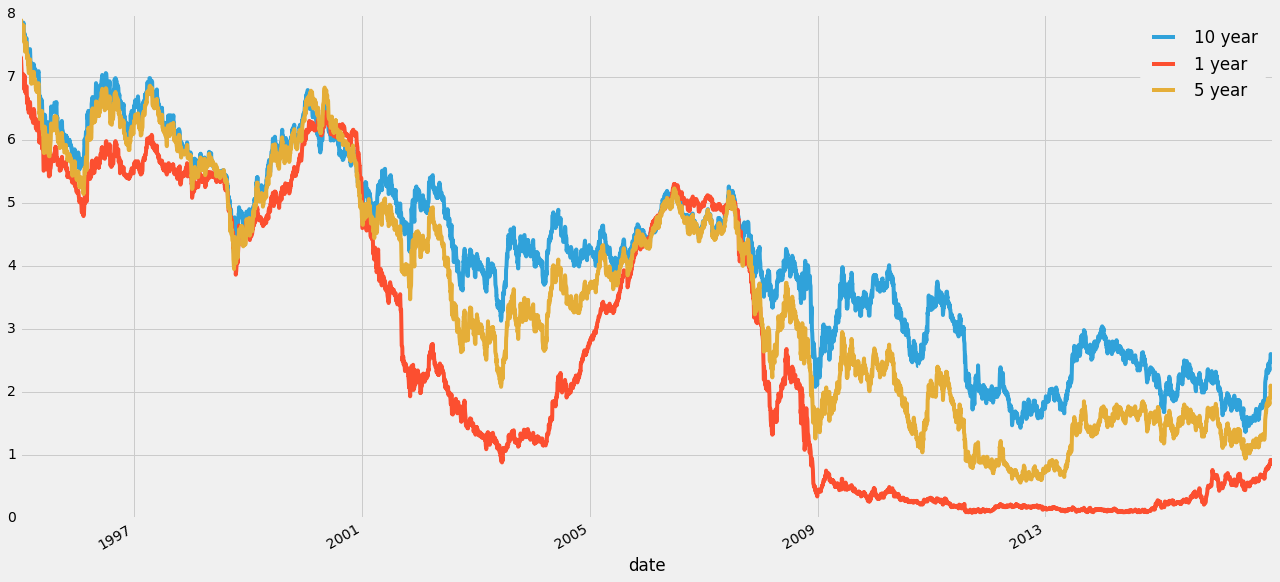

In [53]:
# rates = map(lambda x: (x - rates[0]) / rates[0] , rates)
plt.figure(figsize=(20, 10))
# plt.plot(dates, rates)
df2['bc_10'].plot(label = '10 year')
df2['bc_1'].plot(label = '1 year')
df2['bc_5'].plot(label = '5 year')
plt.legend()